# EDA

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
pd.options.display.max_info_columns = 50
pd.options.display.max_rows = 100
data = pd.read_csv(r"data/cleared_data.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data_eda = data.drop(['Player','Pos'],axis=1)

In [56]:
data_eda.describe()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MVP,votes_first,points_won,points_max,award_share
count,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,...,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000,17672.000000
mean,2003.800475,26.651143,53.485967,26.043572,1258.955976,201.954391,437.290346,0.440831,29.503508,83.650407,0.222214,172.450883,353.639939,0.465182,0.472786,100.258092,132.702241,0.703002,63.351177,159.403916,222.755093,120.420722,41.593651,26.252037,76.845801,...,12.775809,0.511397,0.193980,0.309418,6.004663,14.070801,10.038847,13.142202,1.634461,1.533001,14.400713,18.860055,1.373800,1.287387,2.662042,0.072343,-1.534840,-0.397629,-1.932385,0.636119,0.002320,0.248246,6.452744,39.182888,0.006031
std,11.652288,4.108003,25.281795,29.385690,915.041174,182.920863,382.808807,0.096682,45.380063,120.161668,0.180623,167.062753,332.229848,0.104691,0.099293,109.371716,139.191059,0.189167,66.305310,145.175991,204.720168,141.386983,37.705643,36.928903,66.641880,...,6.149832,0.095807,0.207824,0.215632,4.864932,6.515351,4.965558,9.469635,1.010381,1.756595,6.311463,5.455085,2.096676,1.225067,3.016844,0.100327,3.986079,2.175210,4.941934,1.394529,0.048112,4.194890,64.823243,202.760587,0.059318
min,1982.000000,18.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,-1.000000,-2.100000,-2.519000,-73.800000,-31.100000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,23.000000,34.000000,1.000000,406.750000,49.000000,115.000000,0.404000,0.000000,2.000000,0.000000,38.000000,84.000000,0.430000,0.441000,20.000000,28.000000,0.651750,15.000000,44.000000,62.000000,21.000000,11.000000,4.000000,22.000000,...,9.900000,0.481000,0.008000,0.192750,2.400000,9.300000,6.200000,6.500000,1.100000,0.400000,10.900000,15.300000,0.000000,0.300000,0.300000,0.038000,-3.200000,-1.500000,-3.800000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,26.000000,61.000000,11.000000,1177.000000,156.000000,345.000000,0.445000,5.000000,21.000000,0.273000,123.000000,259.000000,0.473000,0.482000,64.000000,88.000000,0.748000,40.000000,126.000000,171.000000,72.000000,33.000000,13.000000,61.000000,...,12.900000,0.523000,0.116000,0.278000,5.000000,13.100000,9.200000,10.350000,1.500000,1.000000,13.650000,18.500000,0.600000,1.000000,1.700000,0.081000,-1.300000,-0.400000,-1.500000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,29.000000,76.000000,52.000000,2000.000000,309.000000,671.000000,0.488000,44.000000,129.000000,0.357000,258.000000,532.000000,0.512000,0.519000,144.000000,193.000000,0.813000,91.000000,230.000000,320.000000,166.000000,62.000000,33.000000,115.000000,...,15.900000,0.559000,0.345250,0.385000,8.800000,18.200000,13.400000,17.800000,2.000000,2.100000,17.000000,22.100000,2.200000,1.900000,4.100000,0.119000,0.400000,0.800000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,44.000000,85.000000,83.000000,3533.000000,1098.000000,2279.000000,1.000000,402.000000,1028.000000,1.000000,1086.000000,2213.000000,1.000

In [57]:
corr = data_eda.corr() 
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index[1:]
compare = pd.concat( [data_eda[data_eda.MVP == 1][cols].mean(),data_eda[data_eda.MVP == 0][cols].mean()],axis = 1)
compare.columns=['MVP','No-MVP']
print("Korelacja Pearsona")
print(corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10)[1:])
compare


Korelacja Pearsona
votes_first    0.909953
award_share    0.723899
points_won     0.710203
VORP           0.247819
points_max     0.245168
OWS            0.218657
WS             0.211531
FT             0.172093
FTA            0.165466
Name: MVP, dtype: float64


,MVP,No-MVP
votes_first,79.402439,0.064177
award_share,0.896463,0.003960
points_won,961.109756,4.232738
VORP,7.802439,0.619454
points_max,1070.000000,36.785775
OWS,10.880488,1.351693
WS,15.895122,2.631269
FT,490.560976,99.350462
FTA,610.292683,131.591628


In [58]:
corr = data_eda.corr(method='spearman') 
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index[1:]
compare = pd.concat( [data_eda[data_eda.MVP == 1][cols].mean(),data_eda[data_eda.MVP == 0][cols].mean()],axis = 1)
compare.columns=['MVP','No-MVP']
print("Korelacja Spearmana")
print(corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10)[1:])
compare

Korelacja Spearmana
votes_first    0.487214
award_share    0.254191
points_won     0.254023
points_max     0.245799
WS             0.082726
OWS            0.082346
VORP           0.082285
PER            0.081786
WS/48          0.081696
Name: MVP, dtype: float64


,MVP,No-MVP
votes_first,79.402439,0.064177
award_share,0.896463,0.003960
points_won,961.109756,4.232738
points_max,1070.000000,36.785775
WS,15.895122,2.631269
OWS,10.880488,1.351693
VORP,7.802439,0.619454
PER,28.031707,12.740332
WS/48,0.264488,0.071896


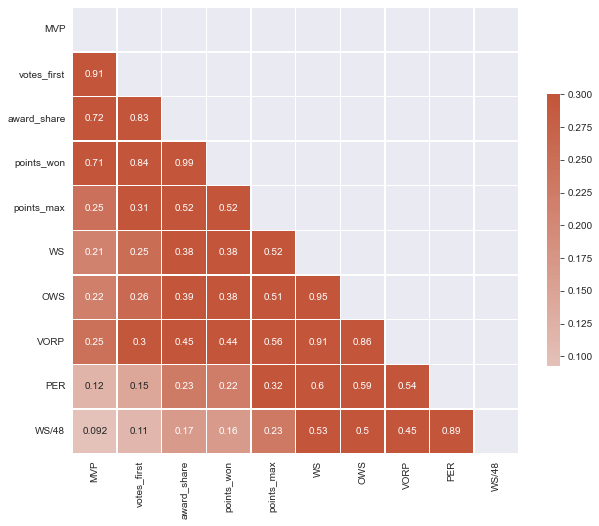

In [59]:
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index
mask = np.triu(np.ones_like(data_eda[cols].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = plt.gcf()
fig.set_size_inches(10,10)

sns.heatmap(data_eda[cols].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)
fig.set_facecolor('white')            

Dane typu FG% sa wynikiem dzielenia dwoch innych kolumn wiec należy je usunąć 

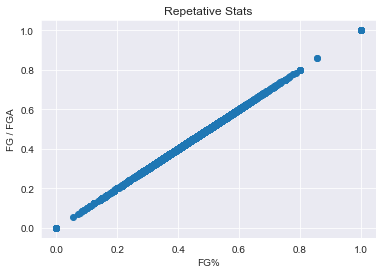

array([[ 1., nan],
       [nan, nan]])

In [60]:
plt.scatter(data["FG%"], data["FG"]/data["FGA"])
plt.xlabel("FG%")
plt.ylabel("FG / FGA")
plt.title("Repetative Stats")
plt.show()
np.corrcoef(data["FG%"], data["FGA"]/data["FG"])

In [61]:
data = data.drop(columns = ["FG%", "3P%","2P%","FT%"], axis = 1)

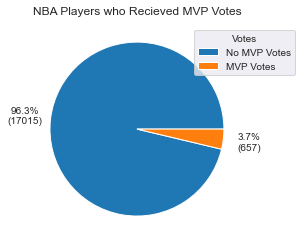

In [62]:
from collections import Counter

classes = data["award_share"] > 0

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Players who Recieved MVP Votes")
ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

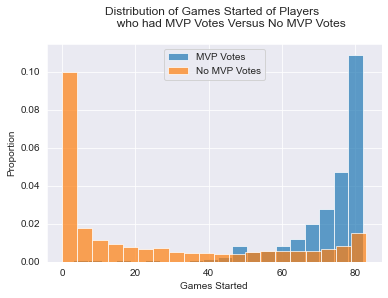

In [63]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]
plt.hist(mvpShares["GS"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["GS"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("Games Started")
plt.title("""Distribution of Games Started of Players 
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

In [64]:
mvpShares["GS"].mean() - 3*mvpShares["GS"].std()

35.92094372561285

In [65]:
mvpShares[mvpShares["GS"] < 36][["Year", "Player", "G", "GS",'award_share']].reset_index(drop = True)

,Year,Player,G,GS,award_share
0,1982,Michael Cooper,76,14.0,0.004
1,1991,Kevin McHale,68,10.0,0.001
2,1992,Detlef Schrempf,80,4.0,0.001
3,1995,Michael Jordan,17,17.0,0.011
4,1995,Dennis Rodman,49,26.0,0.009
5,1996,Magic Johnson,32,9.0,0.007
6,1999,Darrell Armstrong,50,15.0,0.002
7,1999,Rasheed Wallace,49,18.0,0.001
8,2008,Manu Ginobili,74,23.0,0.007
9,2010,Manu Ginobili,75,21.0,0.002


In [66]:
data = data[data["GS"] > 36]
data = data.reset_index(drop = True)
len(data)

5715

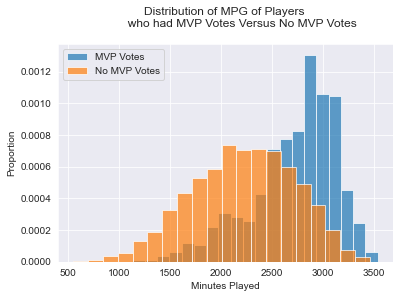

The cutoff is 1467.392 minutes 


In [67]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]

plt.hist(mvpShares["MP"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["MP"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("Minutes Played")
plt.title("""Distribution of MPG of Players 
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

mp_cutoff = mvpShares["MP"].mean() - 3*mvpShares["MP"].std()
print(f"The cutoff is {mp_cutoff:.3f} minutes ")

In [68]:
mvpShares[mvpShares["MP"] < 1467.392][["Year", "Player", "MP",'award_share']].reset_index(drop = True)

,Year,Player,MP,award_share
0,1999,Mark Jackson,1382.0,0.001
1,1999,Arvydas Sabonis,1349.0,0.003
2,2007,Shaquille O'Neal,1135.0,0.002
3,2012,Derrick Rose,1375.0,0.004


In [69]:
data = data[data["MP"] > 1467.392]
data = data.reset_index(drop = True)
len(data)

5348

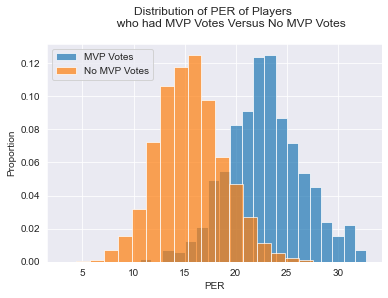

The cutoff is 11.825 PER


In [70]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]

plt.hist(mvpShares["PER"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["PER"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.xlabel("PER")
plt.ylabel("Proportion")
plt.title("""Distribution of PER of Players 
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

pts_cutoff = mvpShares["PER"].mean() - 3 * mvpShares["PER"].std()
print(f"The cutoff is {pts_cutoff:.3f} PER")

In [71]:
mvpShares[mvpShares["PER"] < 11.825][["Year", "Player", "PER",'award_share']].reset_index(drop = True)

,Year,Player,PER,award_share
0,1989,Mark Eaton,10.6,0.004


In [72]:
data = data[data["PER"] >  11.825]
data = data.reset_index(drop = True)
len(data)

4785

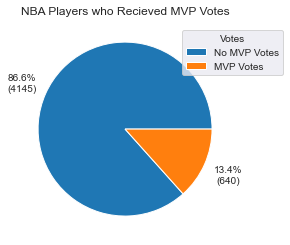

In [73]:
from collections import Counter

classes = data["award_share"] > 0

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Players who Recieved MVP Votes")
ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

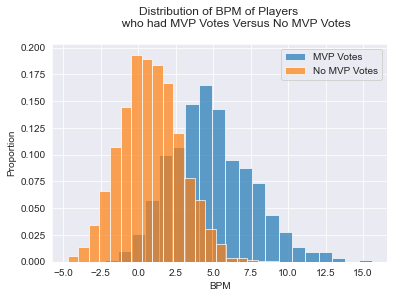

The cutoff is -1.416 VORP
The cutoff is -3.270 BPM


In [74]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]

plt.hist(mvpShares["BPM"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["BPM"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.xlabel("BPM")
plt.ylabel("Proportion")
plt.title("""Distribution of BPM of Players 
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

pts_cutoff = mvpShares["VORP"].mean() - 3 * mvpShares["VORP"].std()
print(f"The cutoff is {pts_cutoff:.3f} VORP")

pts_cutoff = mvpShares["BPM"].mean() - 3 * mvpShares["BPM"].std()
print(f"The cutoff is {pts_cutoff:.3f} BPM")

In [75]:
mvpShares[(mvpShares["VORP"] <  -1.416)][["Year", "Player", "VORP","BPM",'award_share']].reset_index(drop = True)

,Year,Player,VORP,BPM,award_share


In [76]:
mvpShares[(mvpShares["BPM"] <  -3.270)][["Year", "Player", "VORP","BPM",'award_share']].reset_index(drop = True)

,Year,Player,VORP,BPM,award_share


In [77]:
data = data[ (data["VORP"] >  -1.416) & (data["BPM"] >  -3.270) ]
data = data.reset_index(drop = True)
len(data)

4727

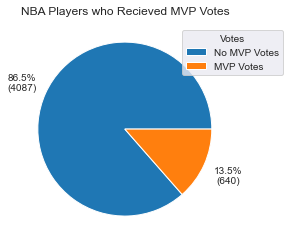

In [78]:
from collections import Counter

classes = data["award_share"] > 0

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Players who Recieved MVP Votes")
ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

In [79]:
data_old = data.copy()

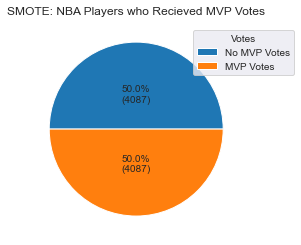

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 1)
data, classes = smote.fit_resample(data.drop(["Player","Pos"],axis=1), classes)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 0.4)

ax.set_title("SMOTE: NBA Players who Recieved MVP Votes")

ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

In [81]:
data["is_smote"] = data.index >= len(data_old)
labeledDataDf = data.merge(data_old, how = "left")

In [37]:
labeledDataDf.to_csv("data/data_after_eda.csv")

In [82]:
years = data_old['Year'].unique()
pts = labeledDataDf.groupby('Year')['PTS'].mean()
threes = labeledDataDf.groupby('Year')['3PA'].mean()
fg = labeledDataDf.groupby('Year')['FG%'].mean()
blk = labeledDataDf.groupby('Year')['BLK'].mean()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)
sns.lineplot(years,pts,ax = ax[0,0])
ax[0,0].set_title("PTS",fontsize=20)
sns.lineplot(years,threes,ax = ax[0,1])
ax[0,1].set_title("Threes",fontsize=20)
sns.lineplot(years,fg,ax = ax[1,0])
ax[1,0].set_title("FG",fontsize=20)
sns.lineplot(years,blk,ax = ax[1,1])
ax[1,1].set_title("BLK",fontsize=20)
fig.set_facecolor('white')


KeyError: 'Column not found: FG%'

c:\Users\THINK\anaconda3\envs\ML_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\ML_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\ML_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

Text(0.5, 1.0, 'PER')

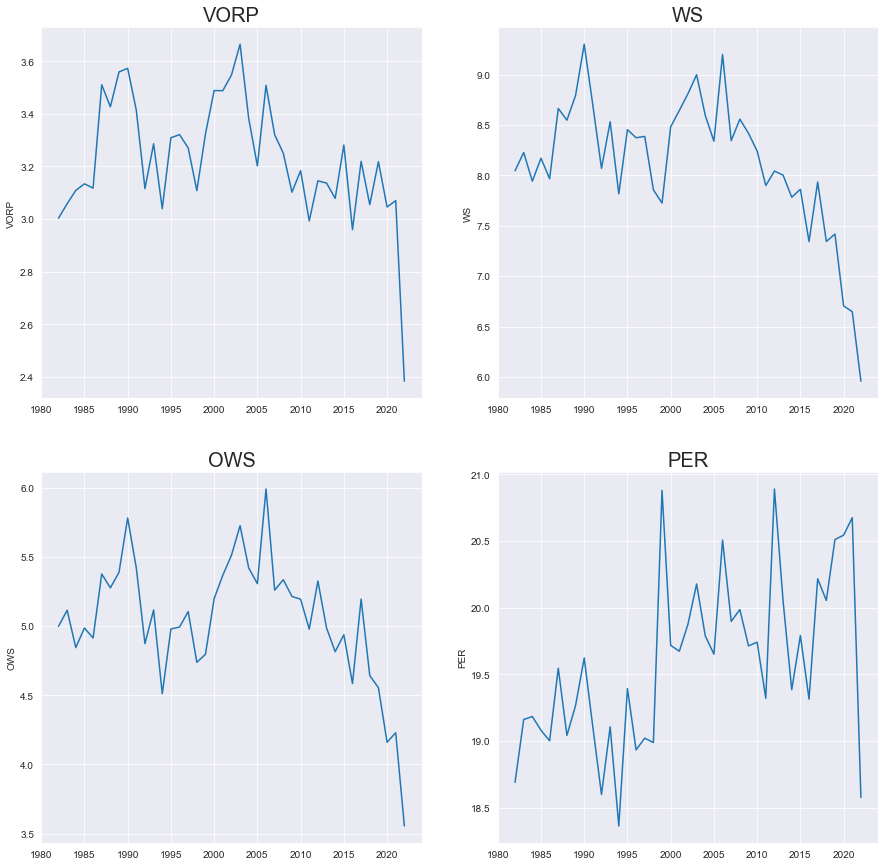

In [83]:
years = data_old['Year'].unique()
vorp = labeledDataDf.groupby('Year')['VORP'].mean()
ws = labeledDataDf.groupby('Year')['WS'].mean()
ows = labeledDataDf.groupby('Year')['OWS'].mean()
per = labeledDataDf.groupby('Year')['PER'].mean()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)
sns.lineplot(years,vorp,ax = ax[0,0])
ax[0,0].set_title("VORP",fontsize=20)
sns.lineplot(years,ws,ax = ax[0,1])
ax[0,1].set_title("WS",fontsize=20)
sns.lineplot(years,ows,ax = ax[1,0])
ax[1,0].set_title("OWS",fontsize=20)
sns.lineplot(years,per,ax = ax[1,1])
ax[1,1].set_title("PER",fontsize=20)


c:\Users\THINK\anaconda3\envs\ML_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\ML_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Age'>

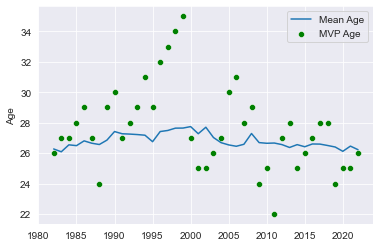

In [84]:
ages = data_old.groupby('Year')['Age'].mean()

sns.lineplot(years,ages,label="Mean Age")
sns.scatterplot(years,data_old[data_old.MVP == 1]['Age'],color='green',label="MVP Age")


<AxesSubplot:xlabel='Age', ylabel='Count'>

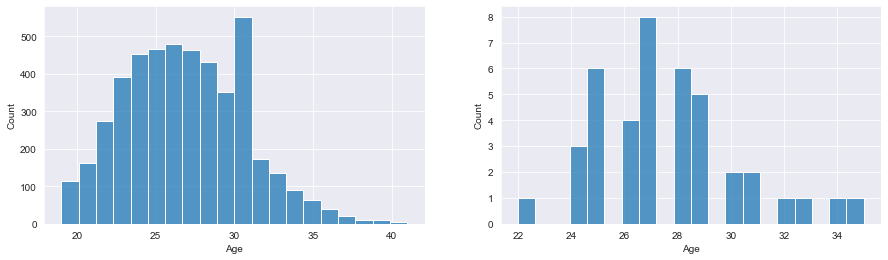

In [87]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
sns.histplot(data_old[data_old.MVP == 0]['Age'],ax=axs[0],bins=20)
sns.histplot(data_old[data_old.MVP == 1]['Age'],ax=axs[1],bins=20)